An exacerbation's start can be spotted by the pattern [False, True] in Is Exacerbated. Similarly, it's [True, False] for an exacerbation's end.

Functions exported to `ex_labels_data.py`

In [2]:
import ex_labels_data
import numpy as np
import pandas as pd
import O2_FEV1_df
import seaborn as sns
import matplotlib.pyplot as plt
import src.o2_fev1_analysis.factors_data as factors_data

In [2]:
O2_FEV1 = O2_FEV1_df.create()
ex_labels = ex_labels_data.load()
O2_FEV1_with_ex_labels = ex_labels_data.inner_merge_with(
    O2_FEV1, ex_labels, exclude_no_ex=True
)
O2_FEV1_with_ex_labels.head()


** Loading measurements data **


/Users/tristan.trebaol/Desktop/PhD/Code/phd/src/data/measurements_data.py:101: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datadir + "mydata.csv")



* Dropping unnecessary columns from measurements data *
Columns filtered ['User ID', 'UserName', 'Recording Type', 'Date/Time recorded', 'FEV 1', 'Weight in Kg', 'O2 Saturation', 'Pulse (BPM)', 'Rating', 'Temp (deg C)']
Dropping columns {'Predicted FEV', 'FEV 1 %', 'Activity - Steps', 'Activity - Points', 'FEV 10', 'Sputum sample taken?', 'Calories'}

* Renaming columns *
Renamed columns {'Date/Time recorded': 'Date recorded', 'FEV 1': 'FEV1', 'Weight in Kg': 'Weight (kg)'}

* Applying data sanity checks *

FEV1
Dropping 1 entries with FEV1 = 3.45 for user Kings004

Weight (kg)
Dropping 2 entries with Weight (kg) = 6.0 for user Papworth033
Dropping 1 entries with Weight (kg) = 0.55 for user Kings013
Dropping 1 entries with Weight (kg) = 8.262500000000001 for user Papworth017
Dropping 1 entries with Weight (kg) = 1056.0 for user leeds01730
Dropping 1 entries with Weight (kg) = 20.0 for user Papworth019
Warning - ID PapworthSummer has Weight (28.9375) outside 30-122 kg range
Warning - I

/Applications/anaconda3/envs/phd/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/Users/tristan.trebaol/Desktop/PhD/Code/phd/src/data/patient_data.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Height.loc[df.ID == "60"] = tmp * 100
/Applications/anaconda3/envs/phd/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():



* Dropping unnecessary columns from antibiotics data *
Columns filetered: ['ID', 'Antibiotic Name', 'Route', "Home IV's'", 'Start Date', 'Stop Date']
Columns dropped: {'Hospital', 'Study Number', 'Antibiotic ID'}

** Creating DataFrame for O2 FEV1 analysis **
O2 Saturation has 14011 measurements
FEV1 has 9936 measurements
Merged O2 and FEV1 into 9526 entries (initially 14421, removed 4895 NaN)
Asserting that there's only one measurement per ID per day

Created df_O2_FEV1 with 9526 entries (initially 14421, removed 4895)

** Loading exacerbation labels from the predictive classifier **
Initially: 14452 entries (1445 True, 13006 False)
Excluding 1 NaN entry
Finally: 14451 entries (1445 True, 13006 False)

** Inner merge of O2_FEV1 and exacerbated labels on 'ID' and 'Date recorded' **
Data has now 7994 entries and 103 IDs (initially 9526 & 146 in O2_FEV1, 14451 in pred_ex_labels)

Excluding all datapoints for IDs that have no exacerbated labels
Removed 50 IDs, 4002 stable labels (initial

,ID,Date recorded,O2 Saturation,FEV1,Study Date,DOB,Age,Sex,Height,Weight,Predicted FEV1,FEV1 % Predicted,Is Exacerbated
0,100,2015-12-14,97.0,2.81,2015-12-14,1990-08-10,25,Female,173.0,55.2,3.6085,77.871692,False
1,100,2015-12-15,96.0,2.25,2015-12-14,1990-08-10,25,Female,173.0,55.2,3.6085,62.352778,False
2,100,2015-12-16,98.0,2.69,2015-12-14,1990-08-10,25,Female,173.0,55.2,3.6085,74.546210,False
3,100,2015-12-17,98.0,2.54,2015-12-14,1990-08-10,25,Female,173.0,55.2,3.6085,70.389358,False
4,100,2015-12-19,96.0,2.15,2015-12-14,1990-08-10,25,Female,173.0,55.2,3.6085,59.581544,False


In [3]:
test_df = ex_labels[ex_labels.ID == "241"].copy()
test_df = ex_labels_data.mark_ex_transition_period(test_df)
test_df.iloc[30:41]

** Marking transition period around exacerbation start **
Initially:
False    37
True     10
Name: Is Exacerbated, dtype: int64
Finally:
0.0    35
1.0     7
0.5     5
Name: Exacerbation State, dtype: int64


,index,PatientNbr,Study,ID,CalcDate,CalcDatedn,ScenType,Scenario,BaseExample,Measure,Frequency,Percentage,MSExample,Is Exacerbated,Date recorded,Exacerbation State
30,14434,104,SC,241,08-Apr-2016,31,0,Actual,0,NaN,0,0,0,False,2016-04-08,0.0
31,14435,104,SC,241,09-Apr-2016,32,0,Actual,0,NaN,0,0,0,False,2016-04-09,0.0
32,14436,104,SC,241,10-Apr-2016,33,0,Actual,0,NaN,0,0,0,False,2016-04-10,0.0
33,14437,104,SC,241,11-Apr-2016,34,0,Actual,0,NaN,0,0,0,False,2016-04-11,0.0
34,14438,104,SC,241,12-Apr-2016,35,0,Actual,0,NaN,0,0,0,False,2016-04-12,0.0
35,14439,104,SC,241,13-Apr-2016,36,0,Actual,0,NaN,0,0,0,False,2016-04-13,0.5
36,14440,104,SC,241,14-Apr-2016,37,0,Actual,0,NaN,0,0,0,False,2016-04-14,0.5
37,14441,104,SC,241,15-Apr-2016,38,0,Actual,0,NaN,0,0,0,True,2016-04-15,0.5
38,14442,104,SC,241,16-Apr-2016,39,0,Actual,0,NaN,0,0,0,True,2016-04-16,0.5
39,14443,104,SC,241,17-Apr-2016,40,0,Actual,0,NaN,0,0,0,True,2016-04-17,0.5


# Visualization of the transition period
Issues
- [Solved] not sorted by dates
- [Solved] the transition period should be marked by number of days around the start date, not by a certain amount of indices to the right and to the left


** Marking transition period around exacerbation start **
Initially:
False    3269
True      723
Name: Is Exacerbated, dtype: int64
Finally:
0.0    3194
1.0     622
0.5     176
Name: Exacerbation State, dtype: int64


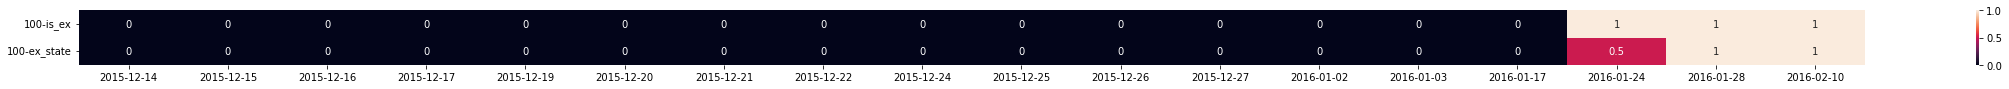

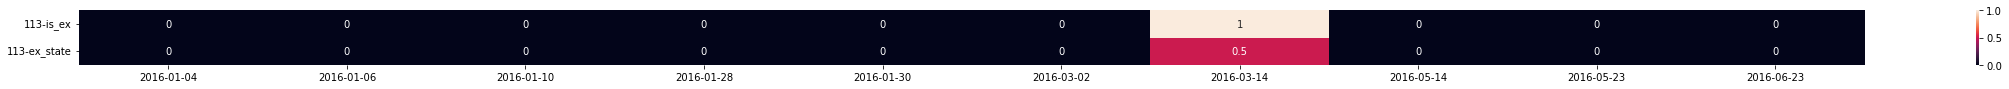

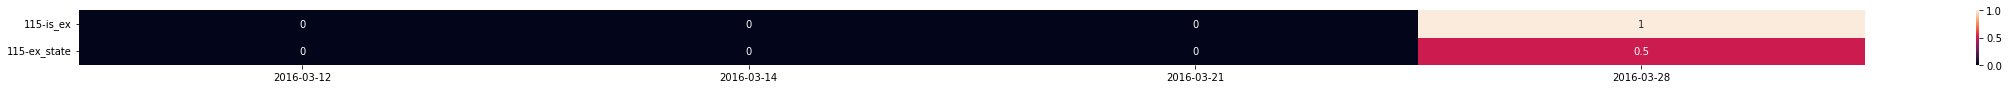

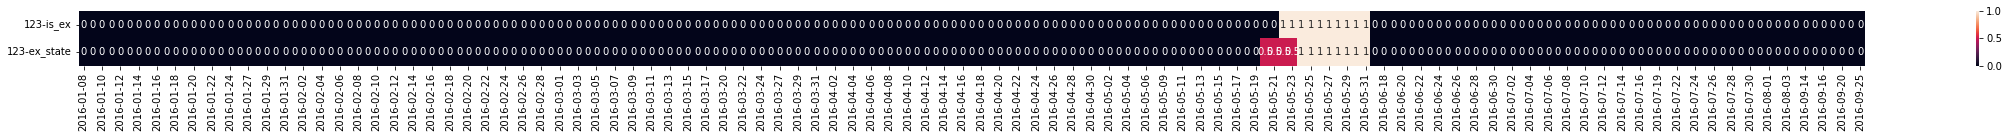

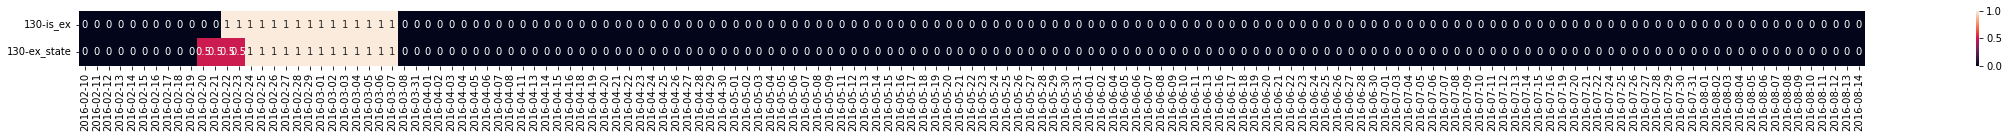

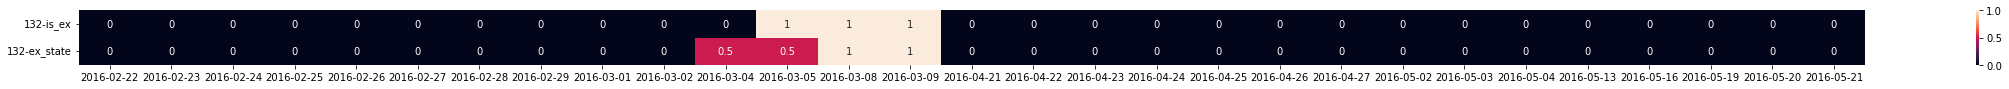

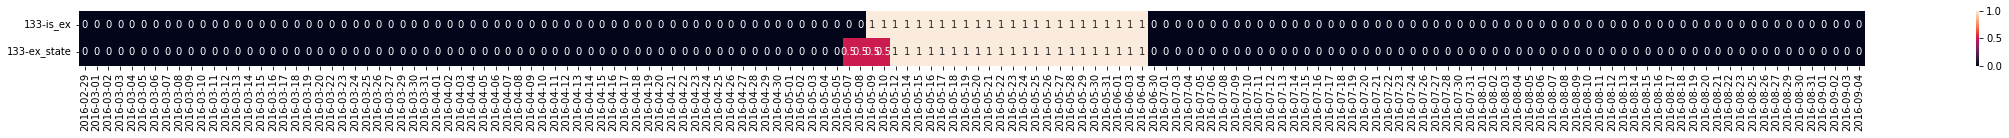

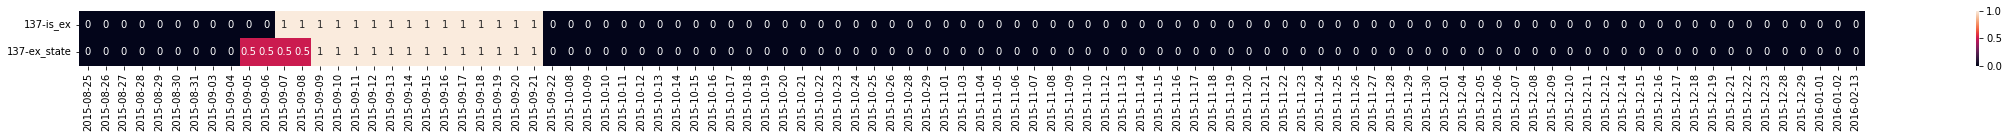

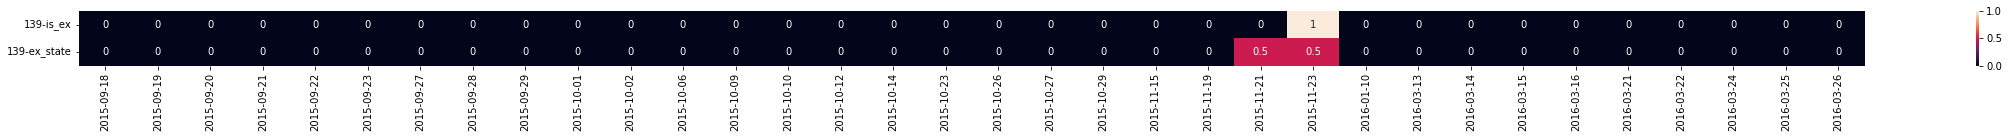

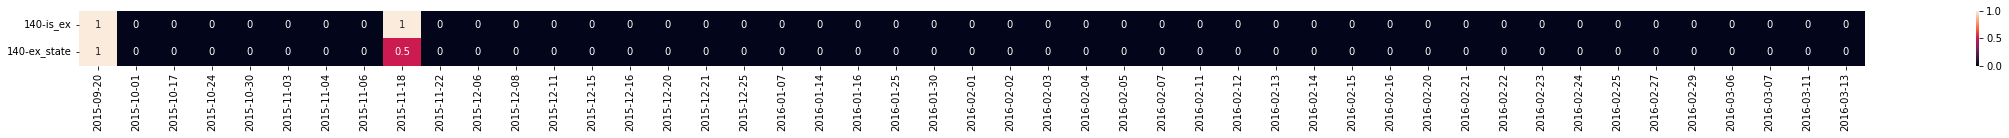

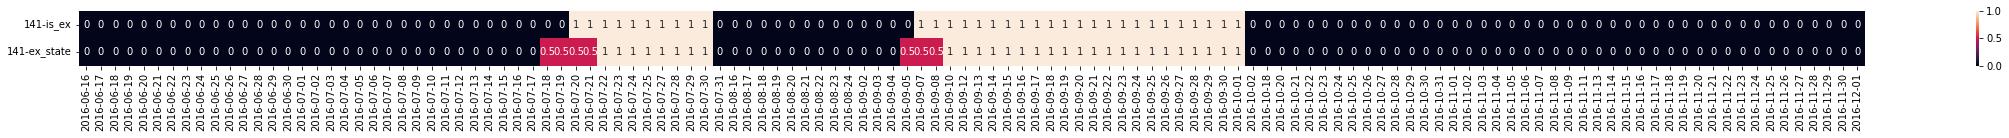

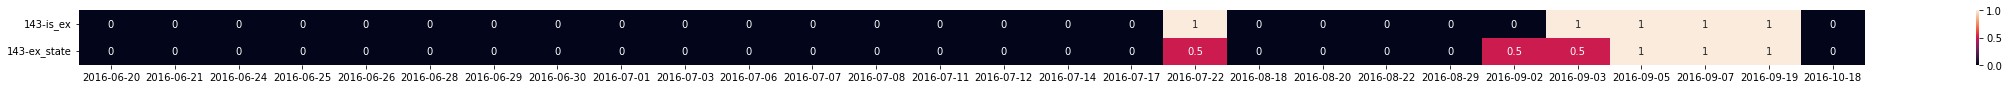

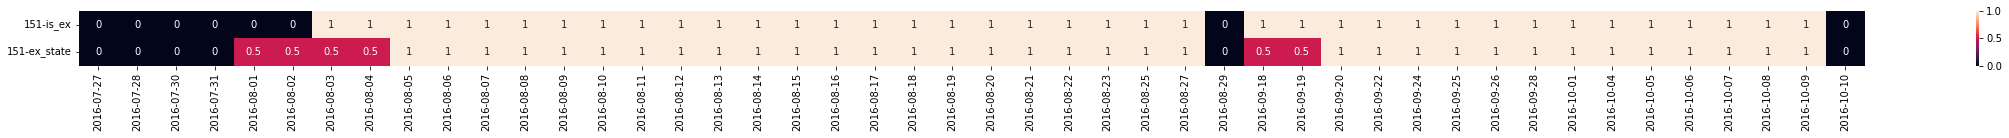

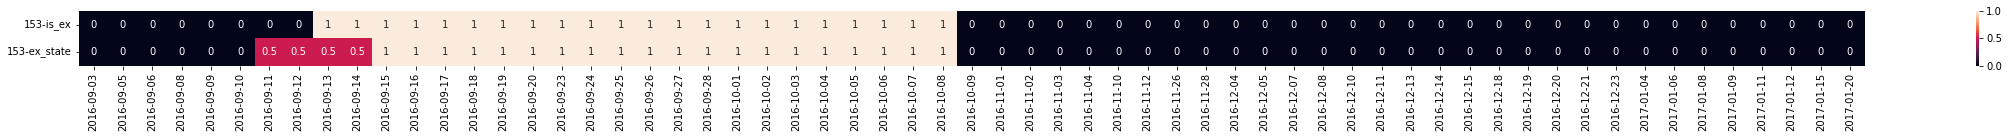

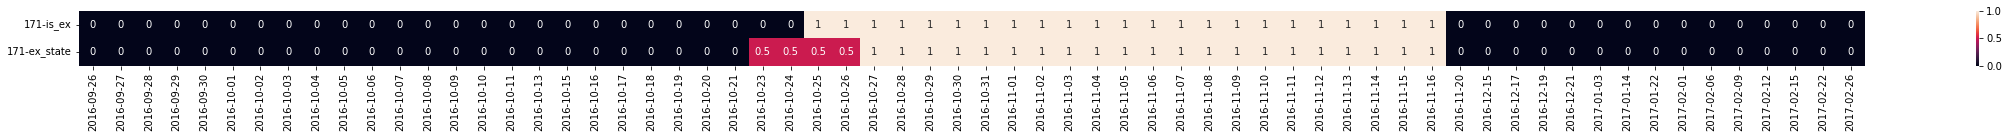

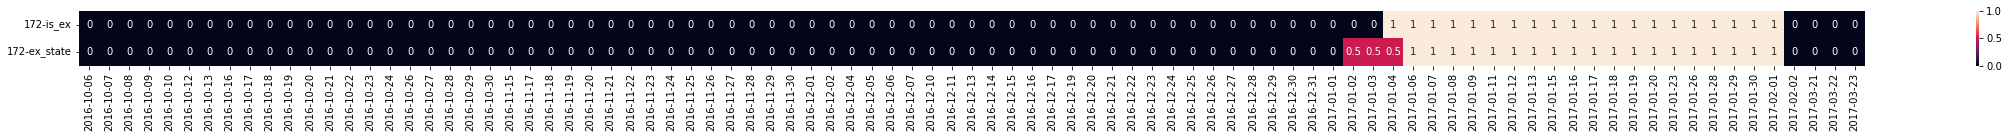

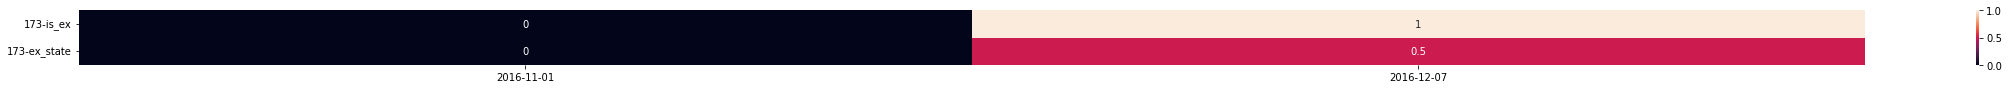

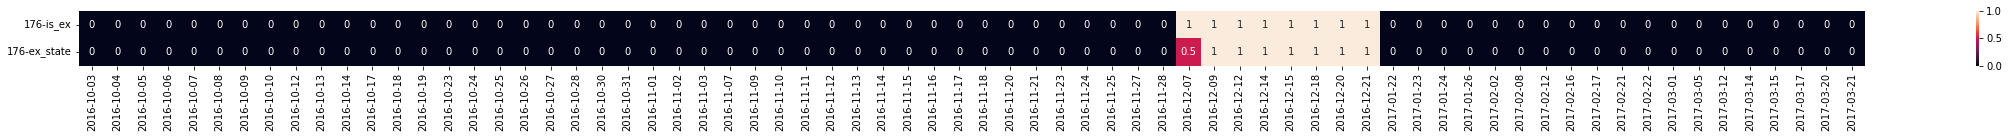

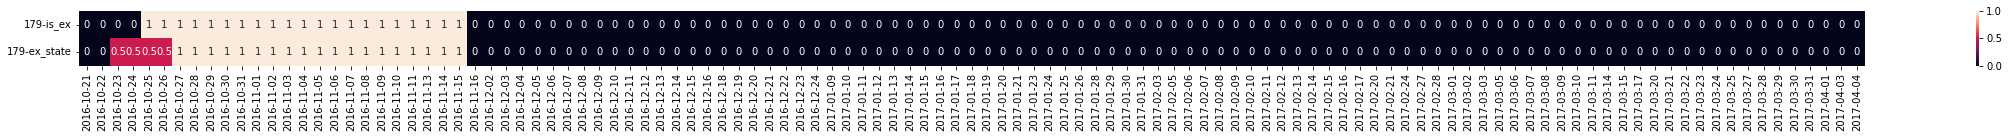

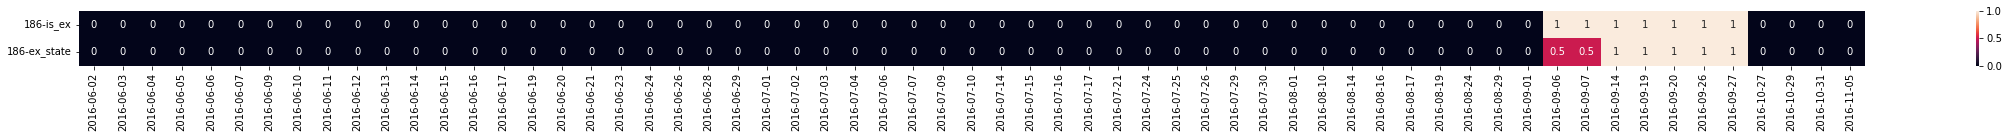

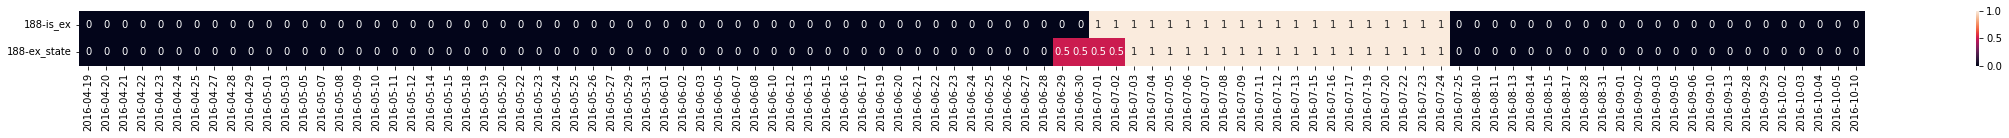

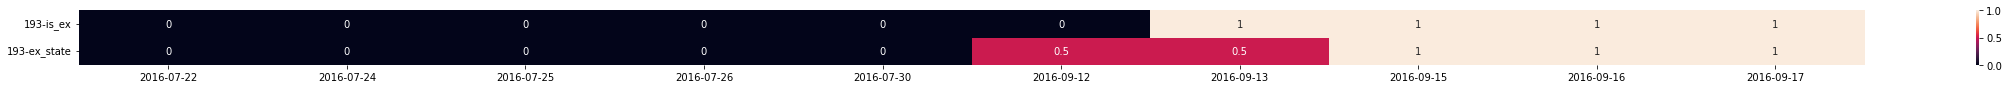

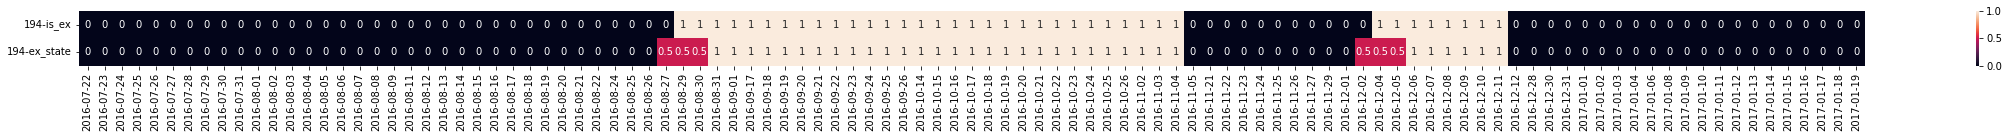

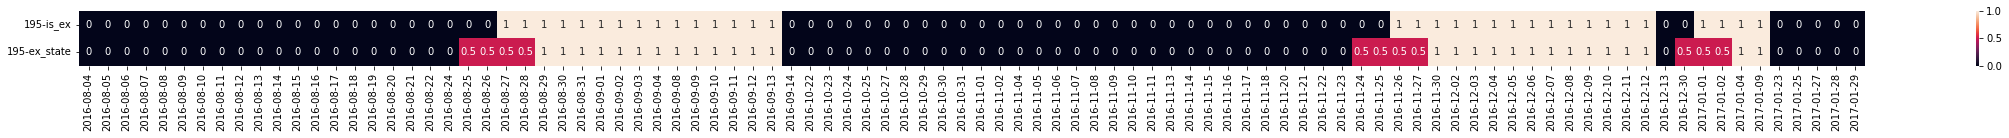

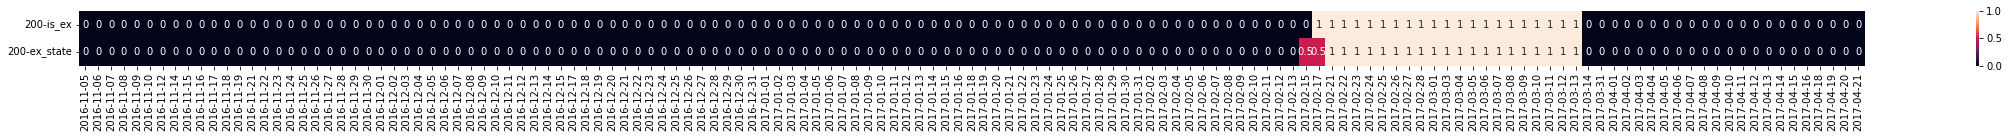

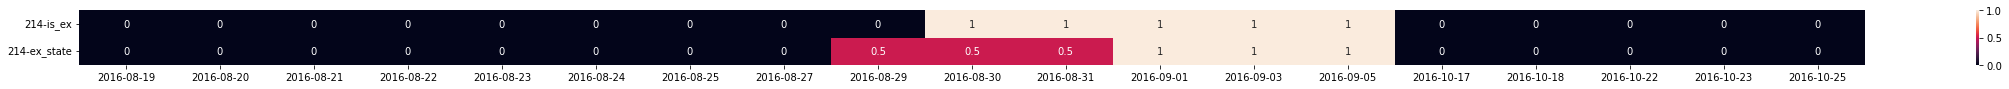

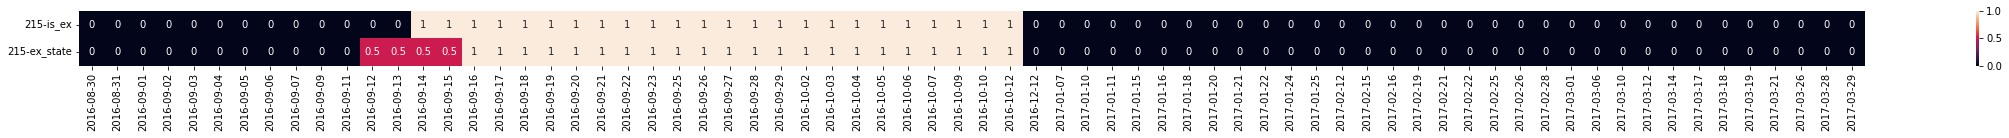

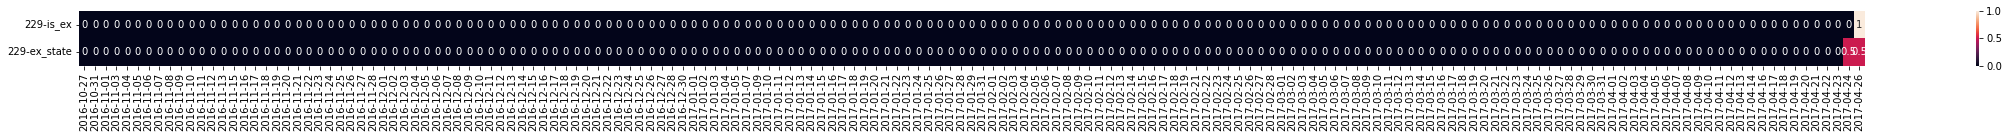

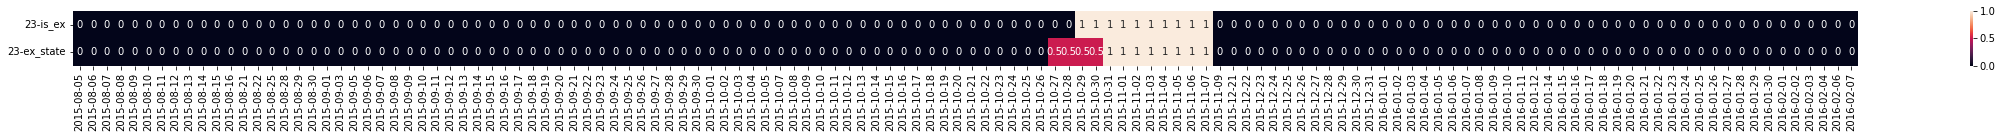

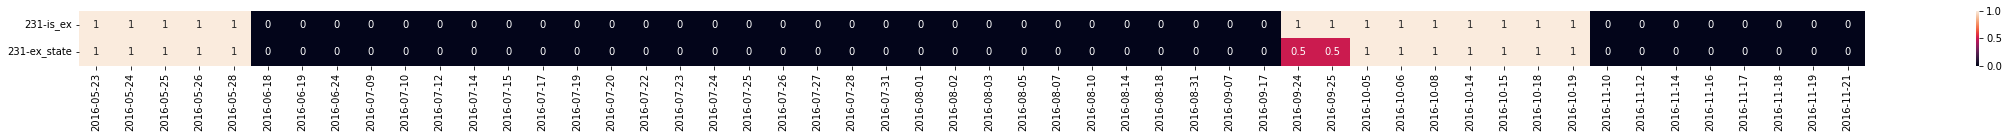

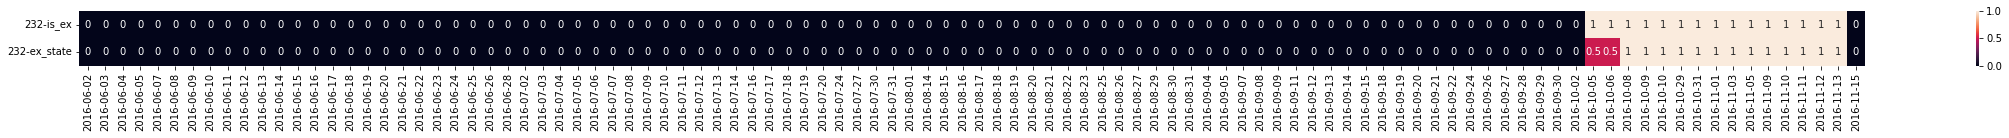

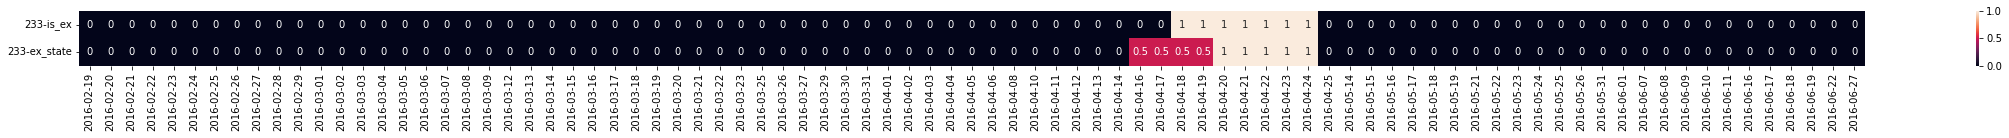

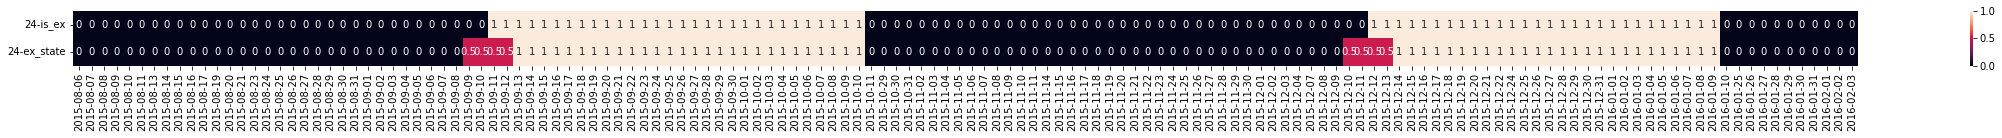

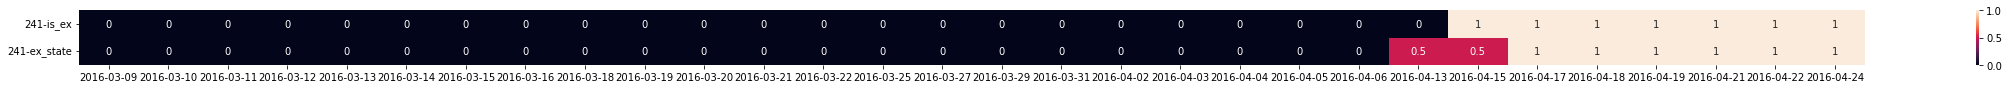

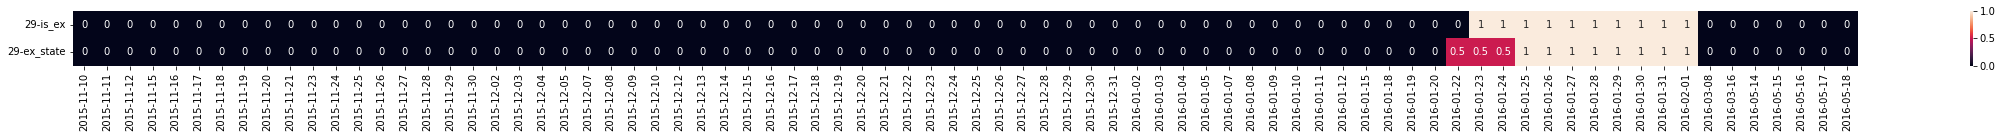

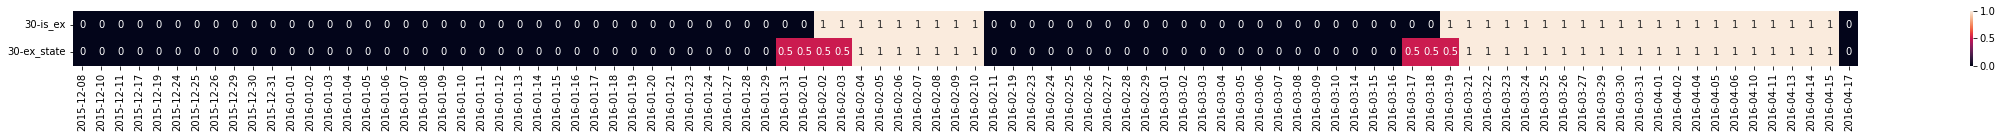

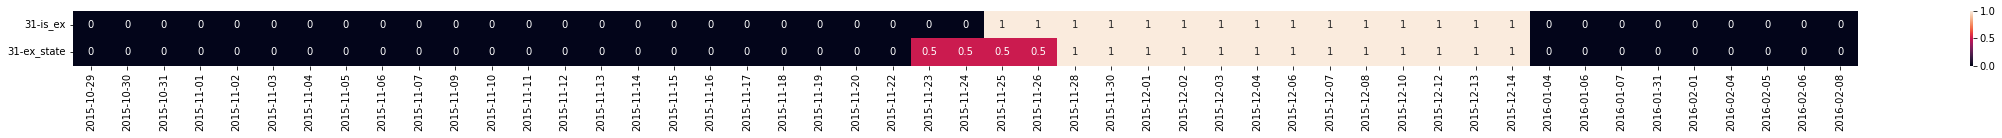

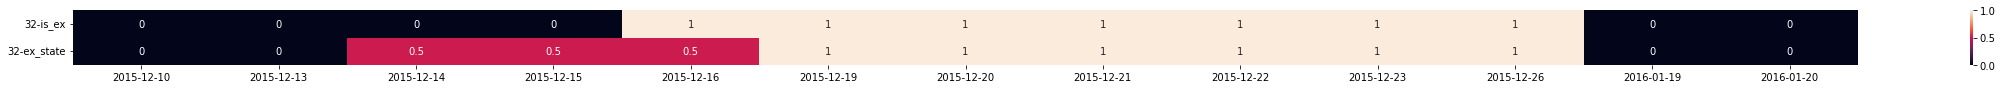

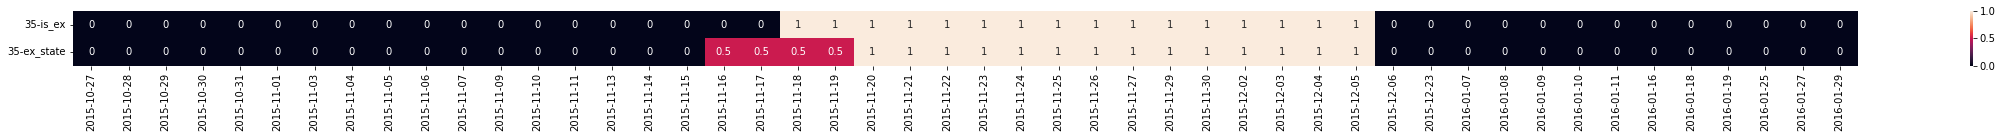

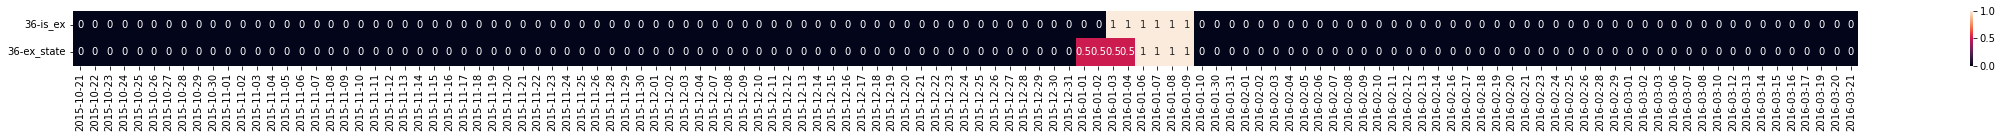

In [3]:
df_transition = ex_labels_data.mark_ex_transition_period(
    O2_FEV1_with_ex_labels, n_days_before=2, n_days_after=2
)

for id in df_transition.ID.unique()[0:40]:
    df_for_ID = df_transition[df_transition.ID == id].copy().reset_index(drop=True)
    df_heatmap = pd.DataFrame(
        np.array(
            [
                df_for_ID["Is Exacerbated"].astype(int),
                df_for_ID["Exacerbation State"].astype(float),
            ]
        ),
        index=[f"{id}-is_ex", f"{id}-ex_state"],
        columns=df_for_ID["Date recorded"].to_numpy(),
    )

    # change fig size
    plt.figure(figsize=(40, 1))
    sns.heatmap(df_heatmap, annot=True)
    plt.show()

# Data loss - average diff of means trade-off of transition period

In [17]:
# Vary amount of days after
transition_params = [
    (0, 0),
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (0, 6),
    (0, 7),
    (0, 8),
]
# # Vary amount of days before
transition_params = [
    (0, 0),
    (1, 0),
    (2, 0),
    (3, 0),
    (4, 0),
    # (5, 0),
    # (6, 0),
    # (7, 0),
    # (8, 0),
]

# Vary both
transition_params = [(0, 0), (0, 2), (0, 4), (1, 2), (1, 4), (2, 2), (2, 4)]

n_data_min = 10

df_separation = pd.DataFrame(
    columns=[
        "Avg diff of means O2 Sat (%)",
        "Avg diff of means FEV1 (L)",
        "#ex labels",
        "#transition labels",
        "#stable labels",
        f"#IDs (>{n_data_min} ex labels)",
    ],
    index=transition_params,
)

for i in range(df_separation.shape[0]):
    n_days_before, n_days_after = df_separation.index[i]

    O2_FEV1_processed = ex_labels_data.mark_ex_transition_period(
        O2_FEV1_with_ex_labels, n_days_before, n_days_after
    )

    # Populate df
    mask_excluding_transition = O2_FEV1_processed["Exacerbation State"] != 0.5
    O2_FEV1_processed = O2_FEV1_processed[mask_excluding_transition]
    O2_FEV1_processed = ex_labels_data.exclude_IDs_where_no_ex_labels(O2_FEV1_processed)
    O2_FEV1_processed = ex_labels_data.at_least_n_datapoints(
        O2_FEV1_processed, n_data_min
    )
    df_separation.iloc[i][f"#IDs (>{n_data_min} ex labels)"] = len(
        O2_FEV1_processed.ID.unique()
    )

    # IDs get removed because
    # 1) they have no ex labels, all have been moved to the transition period
    # 2) they have less than n_data_min ex labels
    df_separation.iloc[i]["#ex labels"] = (
        O2_FEV1_processed["Exacerbation State"] == 1
    ).sum()
    df_separation.iloc[i]["#stable labels"] = (
        O2_FEV1_processed["Exacerbation State"] == 0
    ).sum()
    df_separation.iloc[i]["#transition labels"] = (
        O2_FEV1_processed["Exacerbation State"] == 0.5
    ).sum()

    df_separation.iloc[i]["Avg diff of means O2 Sat (%)"] = round(
        factors_data.get_avg_diff_of_means(
            O2_FEV1_processed,
            "O2 Saturation",
            "Is Exacerbated",
        ),
        2,
    )

    df_separation.iloc[i]["Avg diff of means FEV1 (L)"] = round(
        factors_data.get_avg_diff_of_means(O2_FEV1_processed, "FEV1", "Is Exacerbated"),
        3,
    )

# Compute relative amount of exacerbated labels
n_ex_labels_init = O2_FEV1_with_ex_labels["Is Exacerbated"].sum()
df_separation["% ex labels"] = (
    df_separation["#ex labels"] / n_ex_labels_init * 100
).astype(int)
# Same of stable labels
n_stable_labels_init = O2_FEV1_with_ex_labels.shape[0] - n_ex_labels_init
df_separation["% stable labels"] = (
    df_separation["#stable labels"] / n_stable_labels_init * 100
).astype(int)

# Select all columns except for # exacerbated labels, # transition labels, # stable labels
df_separation[
    [
        "Avg diff of means O2 Sat (%)",
        "Avg diff of means FEV1 (L)",
        "% ex labels",
        "% stable labels",
        f"#IDs (>{n_data_min} ex labels)",
    ]
]


** Marking (0, 0) transition window around exacerbation start **
Initially:
False    3269
True      723
Name: Is Exacerbated, dtype: int64
Finally:
0.0    3269
1.0     723
Name: Exacerbation State, dtype: int64

Excluding all datapoints for IDs that have no exacerbated labels
Removed 0 IDs, 0 stable labels (initially 53 IDs and 3992 labels)

Excluding IDs that have less than 10 stable or exacerbated datapoints
Removed 25/53 IDs with too few data (<10 ex or stable measurements)

** Marking (0, 2) transition window around exacerbation start **
Initially:
False    3269
True      723
Name: Is Exacerbated, dtype: int64
Finally:
0.0    3269
1.0     622
0.5     101
Name: Exacerbation State, dtype: int64

Excluding all datapoints for IDs that have no exacerbated labels
Removed 6 IDs, 234 stable labels (initially 53 IDs and 3891 labels)

Excluding IDs that have less than 10 stable or exacerbated datapoints
Removed 23/47 IDs with too few data (<10 ex or stable measurements)

** Marking (0, 4) t

,Avg diff of means O2 Sat (%),Avg diff of means FEV1 (L),% ex labels,% stable labels,#IDs (>10 ex labels)
"(0, 0)",0.16,0.044,81,68,28
"(0, 2)",0.14,0.049,68,53,24
"(0, 4)",0.15,0.05,61,53,24
"(1, 2)",0.14,0.049,68,53,24
"(1, 4)",0.16,0.051,61,53,24
"(2, 2)",0.14,0.05,68,52,24
"(2, 4)",0.16,0.052,61,52,24
